# Class 24: Clustering

1. Log onto prismia
1. Say hello on Zoom

In [1]:
# %load http://drsmb.co/310
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import string
import pandas as pd

## How Does Kmeans work?


We'll start with the data from dataset5 in assignment 6.

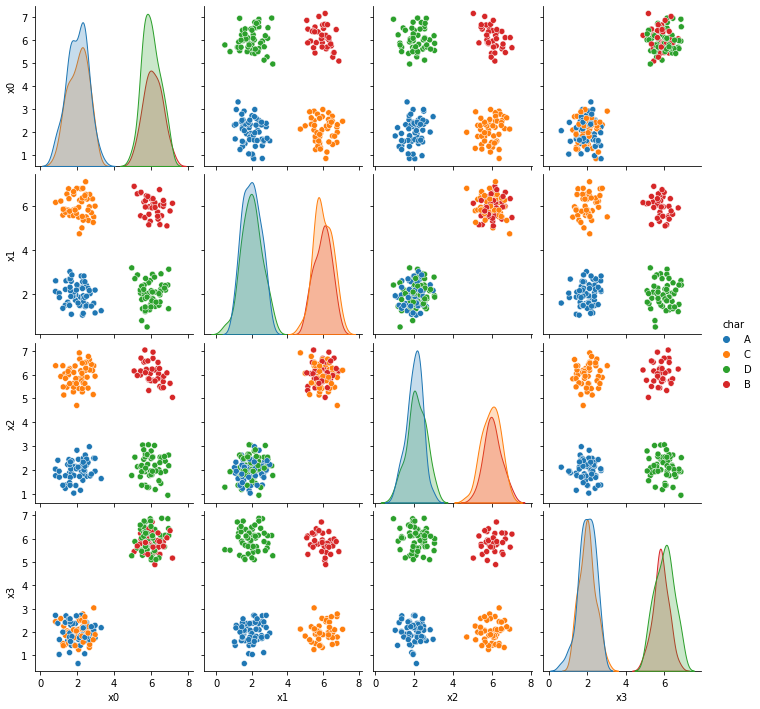

In [2]:
C = 4
N = 200
classes = list(string.ascii_uppercase[:C])
mu = {c: i for c, i in zip(classes,[[2,2, 2,2], [6,6,6,6], [2,6,6,2],[6,2,2,6]])}
sigma = {c: i*.5 for c, i in zip(classes,np.random.random(4))}
sigma

target5 = np.random.choice(classes,N)
data5 = [np.random.multivariate_normal(mu[c],.25*np.eye(C)) for c in target5]
df5 = pd.DataFrame(data = data5,columns = ['x' + str(i) for i in range(C)]).round(2)
rand_target = np.random.choice(classes,N)
obs_target = [np.random.choice([t,r],p=[.85,.15]) for t,r in zip(target5,rand_target)]
df5['char_noisy'] = obs_target
df5['char'] = target5

sns.pairplot(data =df5, hue='char')

We'll work with just two columns and the true labels

In [3]:
data_cols = ['x0','x1']
df = df5[data_cols]
df.head()

,x0,x1
0,1.49,1.62
1,1.28,5.78
2,0.84,2.59
3,1.60,5.57
4,2.28,6.30


We'll also setup some things for making our plots how we'd like in advance

In [4]:
def mu_to_df(mu,i):
    mu_df = pd.DataFrame(mu,columns=data_cols)
    mu_df['iteration'] = str(i)
    mu_df['class'] = ['M'+str(i) for i in range(K)]
    mu_df['type'] = 'mu'
    return mu_df

cmap_pt = sns.color_palette('tab20',8)[1::2]
cmap_mu = sns.color_palette('tab20',8)[0::2]

Now, we'll start our clustering.  First we set how many clusters we ant and then we'll try out randomly assigning the samples and see where that puts the means

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='x0', ylabel='x1'>

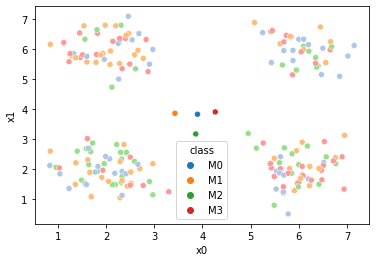

In [5]:

K = 4

df['0'] = np.random.choice(K,size=N)
sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='0',palette=cmap_pt,legend=False)

mu = df.groupby('0')[data_cols].mean().values
mu_df = mu_to_df(mu,0)

# sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
sfig.get_figure().savefig('kmeans00.png')
#     sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='1'
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig)

This puts the means all really close to the center, so we'll try a different initialization for those: randomly sampling 4 points

In [6]:
mu = df[data_cols].sample(n=K).values
mu

array([[0.84, 6.16],
       [6.26, 1.62],
       [2.31, 1.55],
       [2.22, 2.81]])

Now we can compute the distance from each point to each of the four means and use the closest one as an assignment. We'll look at the assignments again.

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


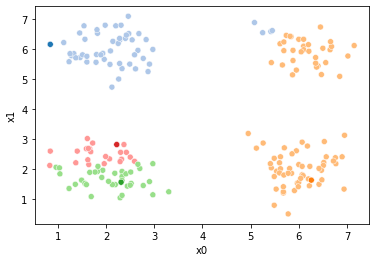

In [7]:
i = 1
df[str(i)] = pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)


sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='1',palette=cmap_pt,legend=False)
# plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)
mu_df = mu_to_df(mu,i)
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
sfig.get_figure().savefig('kmeans01.png')

Now, we cna use those assignments, to compute new means:

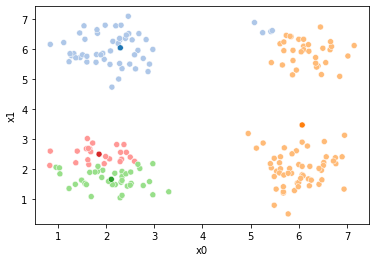

In [8]:
mu = df.groupby('1')[data_cols].mean().values
# sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='1')
# plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)
fig = plt.figure()
mu_df = mu_to_df(mu,i)
sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='1',palette=cmap_pt,legend=False)
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
sfig.get_figure().savefig('kmeans02.png')

Now we can set up a while loop to continue the iterations

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


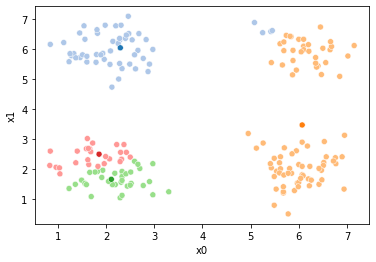

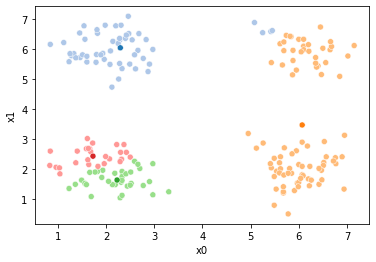

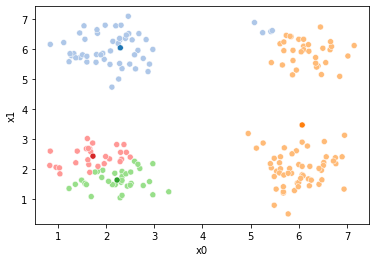

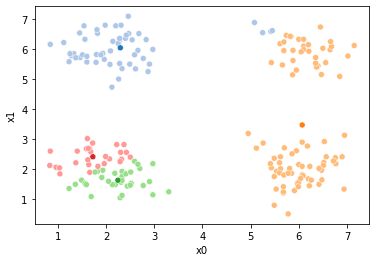

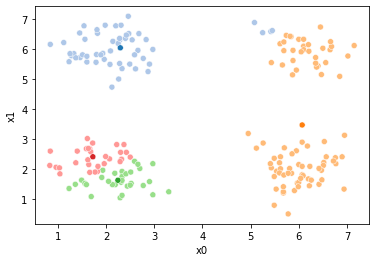

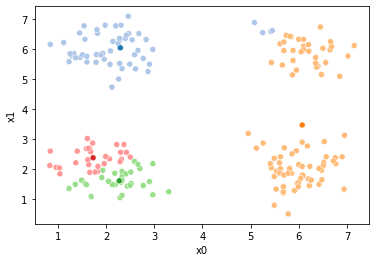

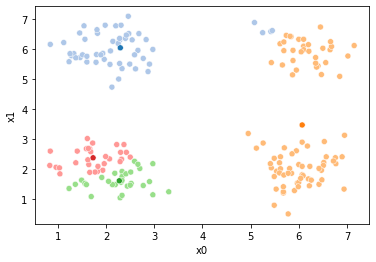

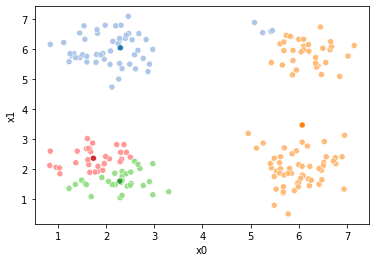

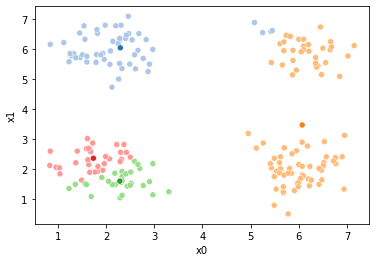

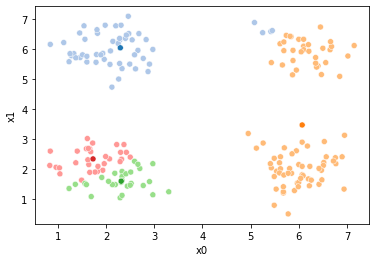

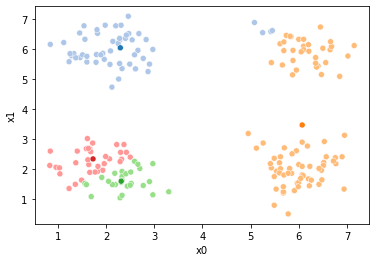

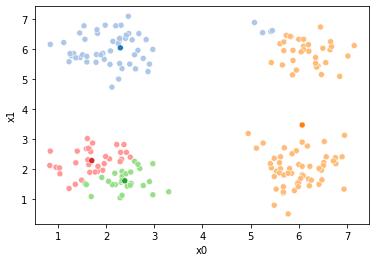

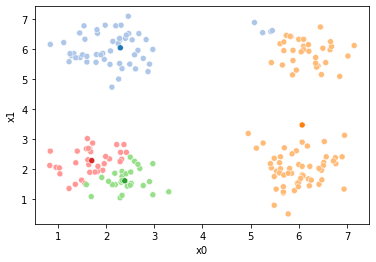

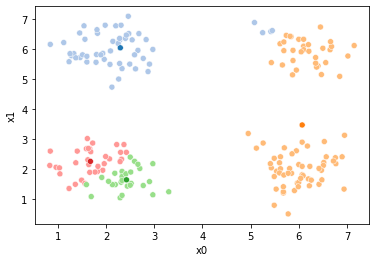

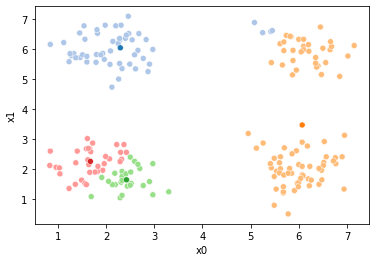

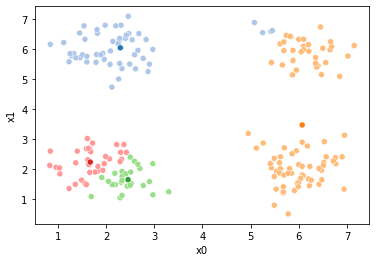

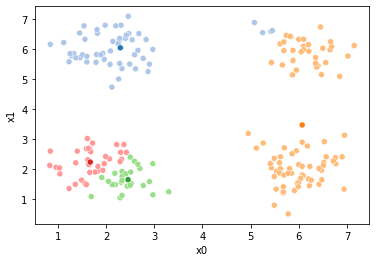

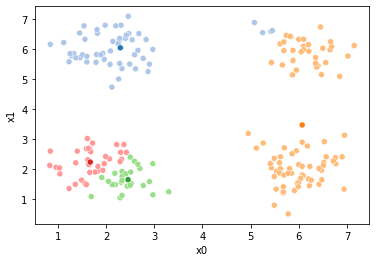

In [9]:
mu_list = [mu_to_df(mu,i)]
cur_old = str(i-1)
cur_new = str(i)
while sum(df[cur_old] !=df[cur_new]) >0:
    cur_old = cur_new
    i +=1
    cur_new = str(i)
    #     update the assigments and plot with the associated means
    df[cur_new] = pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)
    fig = plt.figure()
    sfig = sns.scatterplot(data =df,x='x0',y='x1',hue=cur_new,palette=cmap_pt,legend=False)
    sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
    file_num = str(i*2 -1).zfill(2)
    sfig.get_figure().savefig('kmeans' +file_num + '.png')


    #     update the means and plot with current generating assignments
    mu = df.groupby(cur_new)[data_cols].mean().values
    mu_df = mu_to_df(mu,i)
    mu_list.append(mu_df)

    fig = plt.figure()
    sfig = sns.scatterplot(data =df,x='x0',y='x1',hue=cur_new,palette=cmap_pt,legend=False)
    sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
#     plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)

    file_num = str(i*2).zfill(2)
    sfig.get_figure().savefig('kmeans' +file_num + '.png')

n_iter = i

These plots can be saved and merged into a gif with, for example [imagemagick](https://imagemagick.org/script/download.php) to create the gifs above. Since we've saved them in a single dataframe, we can also look at that

In [10]:
df.head()

,x0,x1,0,1,2,3,4,5,6,7,8,9,10
0,1.49,1.62,2,2,2,2,2,2,3,3,3,3,3
1,1.28,5.78,1,0,0,0,0,0,0,0,0,0,0
2,0.84,2.59,1,3,3,3,3,3,3,3,3,3,3
3,1.60,5.57,1,0,0,0,0,0,0,0,0,0,0
4,2.28,6.30,0,0,0,0,0,0,0,0,0,0,0


We can also manipuate the dataframe to make plotting them all together easier.

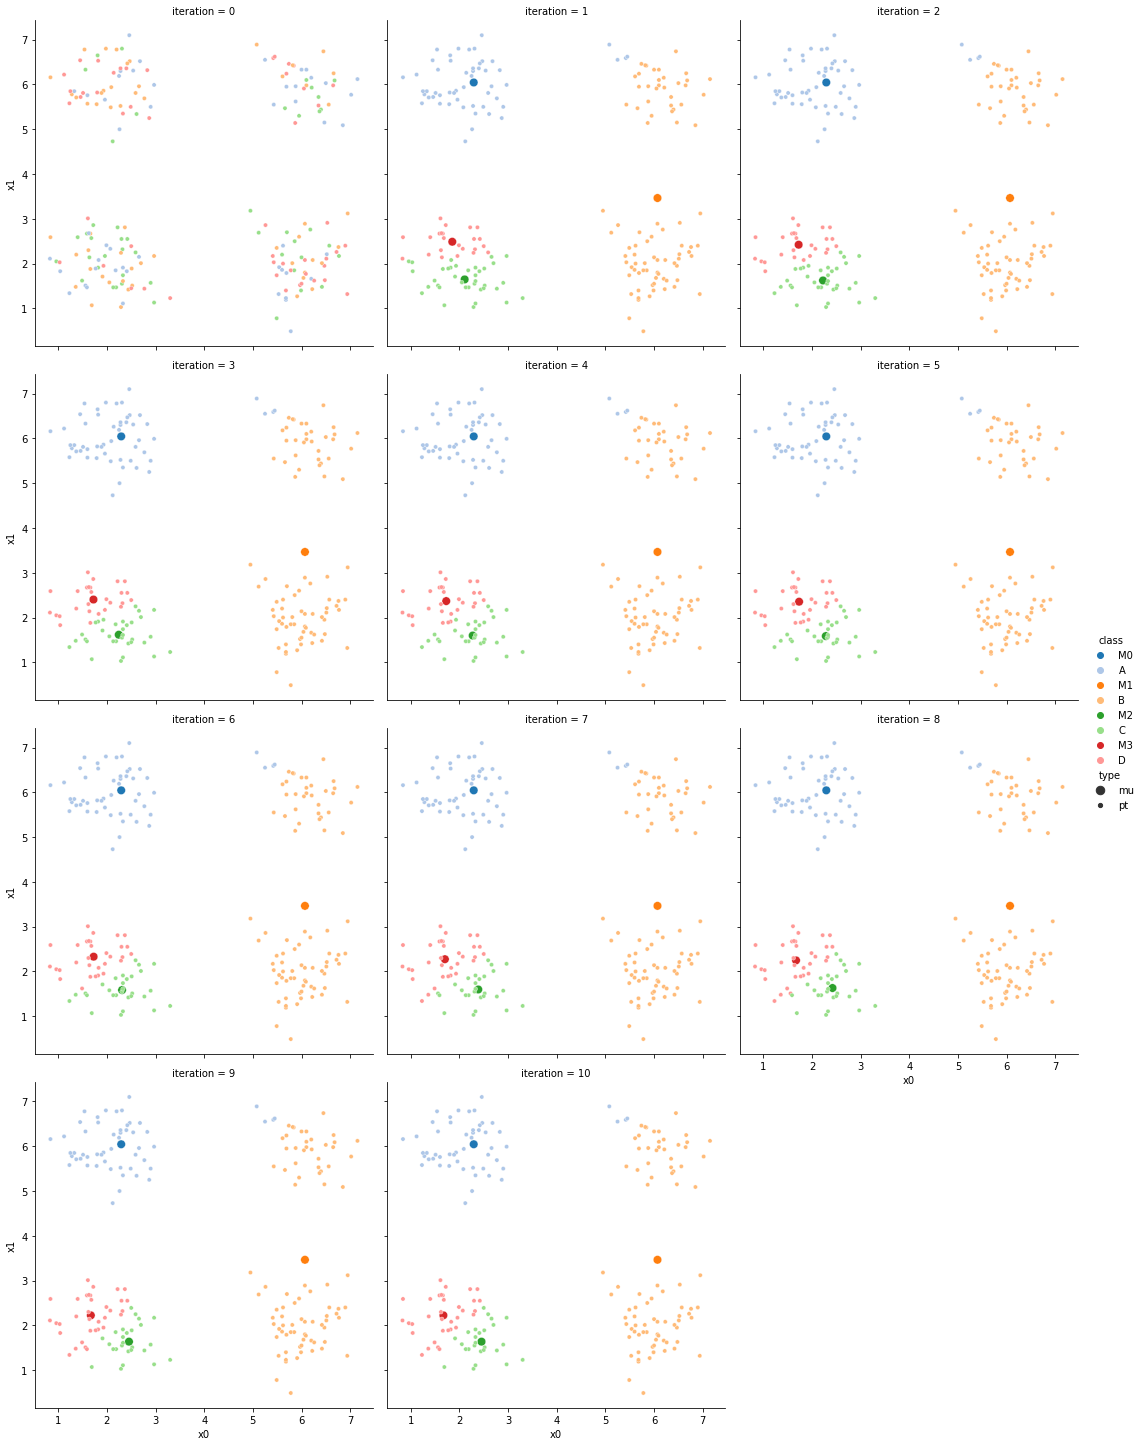

In [11]:
df_vis = df.melt(id_vars = ['x0','x1'], var_name ='iteration',value_name='class')
df_vis.replace({'class':{i:c for i,c in enumerate(string.ascii_uppercase[:C])}},inplace=True)

df_vis['type'] = 'pt'
df_mu_vis = pd.concat([pd.concat(mu_list),df_vis])
cmap = sns.color_palette('tab20',8)
n_iter = i

sns.relplot(data=df_mu_vis,x='x0',y='x1',hue='class',col='iteration',
            col_wrap=3,hue_order = ['M0','A','M1','B','M2','C','M3','D'],
           palette = cmap,size='type',col_order=[str(i) for i in range(n_iter+1)])

Here are a few different runs of the algorithm on the same dtaset.

![k means](img/demo_kmeans1.gif)


![k means](img/demo_kmeans2.gif)



![k means](img/demo_kmeans3.gif)


![k means](img/demo_kmeans4.gif)

![k means](img/demo_kmeans5.gif)

## KMeans with Sklearn

In [12]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [13]:
km3 = KMeans(n_clusters=3)

In [14]:
iris_cluster3 = km3.fit_predict(iris_X)

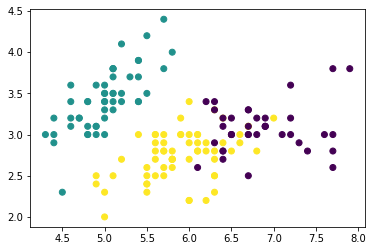

In [15]:
plt.scatter(iris_X[:,0],iris_X[:,1],c=iris_cluster3)

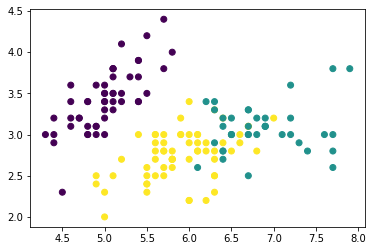

In [16]:
iris_cluster3 = km3.fit_predict(iris_X)
plt.scatter(iris_X[:,0],iris_X[:,1],c=iris_cluster3)